# WE RATE DOGS ANALYSIS

## TABLE OF CONTENTS
 [Introduction](#INTRODUCTION)
 
 [Importing Libraries](#IMPORTING-LIBRARIES)
 
 [Data Gathering](#DATA-GATHERING)
 
 [Assessing the data](#ASSESSING-THE-DATA)
 
 [Assessing Summary](#ASSESSING-SUMMARY)
 
 [Data Cleaning](#DATA-CLEANING)
 
 [Data Storing](#DATA-STORING)
 
 [Data Analysis and Visualization](#DATA-ANALYSIS-AND-VISUALIZATION)
 
 [Conclusions](#CONCLUSIONS)
 
 [Limitations](#LIMITATIONS)

### INTRODUCTION

   WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because **"they're good dogs Brent."** WeRateDogs has received international media coverage. The account was started in 2015 by college student Matt Nelson. 
     With over 9 million followers, the WeRateDogs account has offered great value to the public not only by rating dogs but also by giving educative tips on how to be a better dog owner.
     
  For this project analysis, I would be using python and it's libraries to gather data from different sources and in a variety of formats (the first one would be downloaded locally and read into python, the second one would be downloaded programmatically from a website, and the last one would be gotten through the use of Twitter API and tweepy). After this, I would access it's quality and tidiness then clean it. In summary, I would wrangle data gotten from 3 different sources
  
 Then lastly, I would be analyzing and visualizing the clean, merged data.  

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import tweepy as tw
import requests
import json
from timeit import default_timer as def_timer

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

from wordcloud import WordCloud
from wordcloud import STOPWORDS

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12, 8)

### DATA GATHERING

In [2]:
# read the twitter_archive dataset 

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

Downloading image_prediction.tsv from Udacity's server programmatically

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open("image-predictions.tsv", mode = 'wb') as file:
    file.write(response.content)

In [3]:
image_prediction = pd.read_csv('image-predictions.tsv', '\t')

C:\Users\User\anaconda3\envs\portfolio_projects\lib\site-packages\IPython\core\interactiveshell.py:3397: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


Getting additional data from Twitter's API

In [6]:
consumer_key = '******************************'
consumer_secret = '******************************************************'
access_token = '***************************************************'
access_secret = '********************************************'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tw.API(auth, wait_on_rate_limit=True)

In [4]:
# lets extract the ids from the twitter_archive dataset

tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [7]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = def_timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))        
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Successful")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tw.TweepyException as e:
            print("Failed")
            fails_dict[tweet_id] = e
            pass
end = def_timer()
print(end - start) 
print(fails_dict)

1: 892420643555336193
Successful
2: 892177421306343426
Successful
3: 891815181378084864
Successful
4: 891689557279858688
Successful
5: 891327558926688256
Successful
6: 891087950875897856
Successful
7: 890971913173991426
Successful
8: 890729181411237888
Successful
9: 890609185150312448
Successful
10: 890240255349198849
Successful
11: 890006608113172480
Successful
12: 889880896479866881
Successful
13: 889665388333682689
Successful
14: 889638837579907072
Successful
15: 889531135344209921
Successful
16: 889278841981685760
Successful
17: 888917238123831296
Successful
18: 888804989199671297
Successful
19: 888554962724278272
Successful
20: 888202515573088257
Failed
21: 888078434458587136
Successful
22: 887705289381826560
Successful
23: 887517139158093824
Successful
24: 887473957103951883
Successful
25: 887343217045368832
Successful
26: 887101392804085760
Successful
27: 886983233522544640
Successful
28: 886736880519319552
Successful
29: 886680336477933568
Successful
30: 886366144734445568
Succ

Successful
240: 846874817362120707
Successful
241: 846514051647705089
Successful
242: 846505985330044928
Successful
243: 846153765933735936
Successful
244: 846139713627017216
Successful
245: 846042936437604353
Successful
246: 845812042753855489
Successful
247: 845677943972139009
Successful
248: 845459076796616705
Failed
249: 845397057150107648
Successful
250: 845306882940190720
Successful
251: 845098359547420673
Successful
252: 844979544864018432
Successful
253: 844973813909606400
Successful
254: 844704788403113984
Failed
255: 844580511645339650
Successful
256: 844223788422217728
Successful
257: 843981021012017153
Successful
258: 843856843873095681
Successful
259: 843604394117681152
Successful
260: 843235543001513987
Successful
261: 842892208864923648
Failed
262: 842846295480000512
Successful
263: 842765311967449089
Successful
264: 842535590457499648
Successful
265: 842163532590374912
Successful
266: 842115215311396866
Successful
267: 841833993020538882
Successful
268: 8416805850305413

Successful
475: 816091915477250048
Successful
476: 816062466425819140
Successful
477: 816014286006976512
Successful
478: 815990720817401858
Successful
479: 815966073409433600
Successful
480: 815745968457060357
Successful
481: 815736392542261248
Successful
482: 815639385530101762
Successful
483: 815390420867969024
Successful
484: 814986499976527872
Successful
485: 814638523311648768
Successful
486: 814578408554463233
Successful
487: 814530161257443328
Successful
488: 814153002265309185
Successful
489: 813944609378369540
Successful
490: 813910438903693312
Successful
491: 813812741911748608
Successful
492: 813800681631023104
Successful
493: 813217897535406080
Successful
494: 813202720496779264
Successful
495: 813187593374461952
Successful
496: 813172488309972993
Successful
497: 813157409116065792
Successful
498: 813142292504645637
Successful
499: 813130366689148928
Successful
500: 813127251579564032
Successful
501: 813112105746448384
Successful
502: 813096984823349248
Successful
503: 8130

Successful
710: 785170936622350336
Successful
711: 784826020293709826
Successful
712: 784517518371221505
Successful
713: 784431430411685888
Successful
714: 784183165795655680
Successful
715: 784057939640352768
Successful
716: 783839966405230592
Successful
717: 783821107061198850
Successful
718: 783695101801398276
Successful
719: 783466772167098368
Successful
720: 783391753726550016
Successful
721: 783347506784731136
Successful
722: 783334639985389568
Successful
723: 783085703974514689
Successful
724: 782969140009107456
Successful
725: 782747134529531904
Successful
726: 782722598790725632
Successful
727: 782598640137187329
Successful
728: 782305867769217024
Successful
729: 782021823840026624
Successful
730: 781955203444699136
Successful
731: 781661882474196992
Successful
732: 781655249211752448
Successful
733: 781524693396357120
Successful
734: 781308096455073793
Successful
735: 781251288990355457
Successful
736: 781163403222056960
Successful
737: 780931614150983680
Successful
738: 7808

Rate limit reached. Sleeping for: 197


Successful
902: 758474966123810816
Successful
903: 758467244762497024
Successful
904: 758405701903519748
Successful
905: 758355060040593408
Successful
906: 758099635764359168
Successful
907: 758041019896193024
Successful
908: 757741869644341248
Successful
909: 757729163776290825
Successful
910: 757725642876129280
Successful
911: 757611664640446465
Successful
912: 757597904299253760
Successful
913: 757596066325864448
Successful
914: 757400162377592832
Successful
915: 757393109802180609
Successful
916: 757354760399941633
Successful
917: 756998049151549440
Successful
918: 756939218950160384
Successful
919: 756651752796094464
Successful
920: 756526248105566208
Successful
921: 756303284449767430
Successful
922: 756288534030475264
Successful
923: 756275833623502848
Successful
924: 755955933503782912
Successful
925: 755206590534418437
Successful
926: 755110668769038337
Successful
927: 754874841593970688
Successful
928: 754856583969079297
Successful
929: 754747087846248448
Successful
930: 7544

Successful
1133: 728760639972315136
Successful
1134: 728751179681943552
Successful
1135: 728653952833728512
Successful
1136: 728409960103686147
Successful
1137: 728387165835677696
Successful
1138: 728046963732717569
Successful
1139: 728035342121635841
Successful
1140: 728015554473250816
Successful
1141: 727685679342333952
Successful
1142: 727644517743104000
Successful
1143: 727524757080539137
Successful
1144: 727314416056803329
Successful
1145: 727286334147182592
Successful
1146: 727175381690781696
Successful
1147: 727155742655025152
Successful
1148: 726935089318363137
Successful
1149: 726887082820554753
Successful
1150: 726828223124897792
Successful
1151: 726224900189511680
Successful
1152: 725842289046749185
Successful
1153: 725786712245440512
Successful
1154: 725729321944506368
Successful
1155: 725458796924002305
Successful
1156: 724983749226668032
Successful
1157: 724771698126512129
Successful
1158: 724405726123311104
Successful
1159: 724049859469295616
Successful
1160: 72404634320

Successful
1361: 703268521220972544
Successful
1362: 703079050210877440
Successful
1363: 703041949650034688
Successful
1364: 702932127499816960
Successful
1365: 702899151802126337
Successful
1366: 702684942141153280
Successful
1367: 702671118226825216
Successful
1368: 702598099714314240
Successful
1369: 702539513671897089
Successful
1370: 702332542343577600
Successful
1371: 702321140488925184
Successful
1372: 702276748847800320
Successful
1373: 702217446468493312
Successful
1374: 701981390485725185
Successful
1375: 701952816642965504
Successful
1376: 701889187134500865
Successful
1377: 701805642395348998
Successful
1378: 701601587219795968
Successful
1379: 701570477911896070
Successful
1380: 701545186879471618
Successful
1381: 701214700881756160
Successful
1382: 700890391244103680
Successful
1383: 700864154249383937
Successful
1384: 700847567345688576
Successful
1385: 700796979434098688
Successful
1386: 700747788515020802
Successful
1387: 700518061187723268
Successful
1388: 70050513848

Successful
1589: 686730991906516992
Successful
1590: 686683045143953408
Successful
1591: 686618349602762752
Successful
1592: 686606069955735556
Successful
1593: 686394059078897668
Successful
1594: 686386521809772549
Successful
1595: 686377065986265092
Successful
1596: 686358356425093120
Successful
1597: 686286779679375361
Successful
1598: 686050296934563840
Successful
1599: 686035780142297088
Successful
1600: 686034024800862208
Successful
1601: 686007916130873345
Successful
1602: 686003207160610816
Successful
1603: 685973236358713344
Successful
1604: 685943807276412928
Successful
1605: 685906723014619143
Successful
1606: 685681090388975616
Successful
1607: 685667379192414208
Successful
1608: 685663452032069632
Successful
1609: 685641971164143616
Successful
1610: 685547936038666240
Successful
1611: 685532292383666176
Successful
1612: 685325112850124800
Successful
1613: 685321586178670592
Successful
1614: 685315239903100929
Successful
1615: 685307451701334016
Successful
1616: 68526875363

Rate limit reached. Sleeping for: 179


Successful
1802: 676957860086095872
Successful
1803: 676949632774234114
Successful
1804: 676948236477857792
Successful
1805: 676946864479084545
Successful
1806: 676942428000112642
Successful
1807: 676936541936185344
Successful
1808: 676916996760600576
Successful
1809: 676897532954456065
Successful
1810: 676864501615042560
Successful
1811: 676821958043033607
Successful
1812: 676819651066732545
Successful
1813: 676811746707918848
Successful
1814: 676776431406465024
Successful
1815: 676617503762681856
Successful
1816: 676613908052996102
Successful
1817: 676606785097199616
Successful
1818: 676603393314578432
Successful
1819: 676593408224403456
Successful
1820: 676590572941893632
Successful
1821: 676588346097852417
Successful
1822: 676582956622721024
Successful
1823: 676575501977128964
Successful
1824: 676533798876651520
Successful
1825: 676496375194980353
Successful
1826: 676470639084101634
Successful
1827: 676440007570247681
Successful
1828: 676430933382295552
Successful
1829: 67626357565

Successful
2030: 671855973984772097
Successful
2031: 671789708968640512
Successful
2032: 671768281401958400
Successful
2033: 671763349865160704
Successful
2034: 671744970634719232
Successful
2035: 671743150407421952
Successful
2036: 671735591348891648
Successful
2037: 671729906628341761
Successful
2038: 671561002136281088
Successful
2039: 671550332464455680
Successful
2040: 671547767500775424
Successful
2041: 671544874165002241
Successful
2042: 671542985629241344
Successful
2043: 671538301157904385
Successful
2044: 671536543010570240
Successful
2045: 671533943490011136
Successful
2046: 671528761649688577
Successful
2047: 671520732782923777
Successful
2048: 671518598289059840
Successful
2049: 671511350426865664
Successful
2050: 671504605491109889
Successful
2051: 671497587707535361
Successful
2052: 671488513339211776
Successful
2053: 671486386088865792
Successful
2054: 671485057807351808
Successful
2055: 671390180817915904
Successful
2056: 671362598324076544
Successful
2057: 67135784301

Successful
2258: 667728196545200128
Successful
2259: 667724302356258817
Successful
2260: 667550904950915073
Successful
2261: 667550882905632768
Successful
2262: 667549055577362432
Successful
2263: 667546741521195010
Successful
2264: 667544320556335104
Successful
2265: 667538891197542400
Successful
2266: 667534815156183040
Successful
2267: 667530908589760512
Successful
2268: 667524857454854144
Successful
2269: 667517642048163840
Successful
2270: 667509364010450944
Successful
2271: 667502640335572993
Successful
2272: 667495797102141441
Successful
2273: 667491009379606528
Successful
2274: 667470559035432960
Successful
2275: 667455448082227200
Successful
2276: 667453023279554560
Successful
2277: 667443425659232256
Successful
2278: 667437278097252352
Successful
2279: 667435689202614272
Successful
2280: 667405339315146752
Successful
2281: 667393430834667520
Successful
2282: 667369227918143488
Successful
2283: 667211855547486208
Successful
2284: 667200525029539841
Successful
2285: 66719206699

In [8]:
# saving json file as csv
tweet = pd.read_json("tweet_json.txt", lines=True)
tweet.to_csv("tweet.csv", index=False)

In [4]:
df_tweet = pd.read_csv("tweet.csv")

### ASSESSING THE DATA

First, I'll start with previewing all the dataframes

I will not be displaying the entire dataframe here because of space issues but the dataframes were assessed virtually on Microsoft Excel

In [5]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
df_tweet.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
twitter_archive['retweeted_status_id'].unique()

array([           nan, 8.87473957e+17, 8.86053734e+17, 8.30583321e+17,
       8.78057613e+17, 8.78281511e+17, 6.69000397e+17, 8.76850772e+17,
       8.66334965e+17, 8.68880398e+17, 8.73213776e+17, 8.72657584e+17,
       8.41077006e+17, 8.59196979e+17, 8.68552279e+17, 8.65013420e+17,
       8.66450706e+17, 8.37820168e+17, 8.63062472e+17, 8.06629075e+17,
       8.60563773e+17, 8.60914485e+17, 7.61672994e+17, 8.39549326e+17,
       8.57061112e+17, 8.44704788e+17, 8.56330159e+17, 8.42163533e+17,
       8.55122533e+17, 8.31650052e+17, 8.29374342e+17, 8.48289382e+17,
       8.33124695e+17, 8.32369877e+17, 8.47971000e+17, 7.56288534e+17,
       7.73308824e+17, 8.07106841e+17, 8.17423860e+17, 8.40632337e+17,
       6.67152164e+17, 8.39289919e+17, 8.38905981e+17, 7.83839966e+17,
       8.20749717e+17, 8.37011345e+17, 8.36648149e+17, 8.17827839e+17,
       7.86963064e+17, 8.35264099e+17, 7.53039831e+17, 8.29501995e+17,
       8.32434358e+17, 8.32766382e+17, 7.86709083e+17, 7.93286476e+17,
      

Note that not all of the unique values are 'nan' so there must be some retweets in the dataframe. 

In [10]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
image_prediction['p1_dog'].unique()

array([ True, False])

Rows with the value 'True' are dogs while rows with 'False' are not dogs based on the prediction using machine learning models. 

In [12]:
image_prediction.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


The p1 and p1_conf columns are not descriptive enough

Ideally, all of the rating_denominator in the twitter_archive table should be 10 in order to give an equal score rating method to all the tweets. Lets see if that is true. Also, lets virtually assess the table to see if there are any more inconsistencies with regards to the ratings. 

In [13]:
twitter_archive['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

From what we can see above, there are lots of rating denominators that are not equal to 10. Lets dive a bit deeply into this 

In [14]:
not_equal_to_ten = twitter_archive.query('rating_denominator != 10')

pd.set_option("display.max_colwidth", -1)
not_equal_to_ten[['tweet_id','text','rating_numerator', 'rating_denominator']]

C:\Users\User\AppData\Local\Temp\ipykernel_2584\3824972203.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


Now it's clear that there are so many inconsistencies with respect to the rating_denominator. Some of them are due to scores not properly rounded up, scores not properly recorded (ie recording date instead of the actual score ) and sometimes, recording rows that are not even related to dog ratings. 

NB: I assessed the table virtually using Microsoft Excel and found more inconsistencies in the rating_numerator such as wrongly recorded scores. All these would be taken care of in the Cleaning section of this project

In [15]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Columns such as in_reply_status_id, in_reply_to_user_id, source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls are not needed for this analysis. 

In [16]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2326 non-null   object 
 1   id                             2326 non-null   int64  
 2   id_str                         2326 non-null   int64  
 3   full_text                      2326 non-null   object 
 4   truncated                      2326 non-null   bool   
 5   display_text_range             2326 non-null   object 
 6   entities                       2326 non-null   object 
 7   extended_entities              2056 non-null   object 
 8   source                         2326 non-null   object 
 9   in_reply_to_status_id          77 non-null     float64
 10  in_reply_to_status_id_str      77 non-null     float64
 11  in_reply_to_user_id            77 non-null     float64
 12  in_reply_to_user_id_str        77 non-null     f

Every column except the id, retweet_count and favorite_count is not needed for this analysis

In [17]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The jpg_url, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog columns are not needed for this analysis

In [18]:
twitter_archive['timestamp']

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
                  ...            
2351    2015-11-16 00:24:50 +0000
2352    2015-11-16 00:04:52 +0000
2353    2015-11-15 23:21:54 +0000
2354    2015-11-15 23:05:30 +0000
2355    2015-11-15 22:32:08 +0000
Name: timestamp, Length: 2356, dtype: object

There are some extra characters(+0000) in the timestamp column

In [19]:
twitter_archive.dtypes

tweet_id                      int64  
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                     object 
source                        object 
text                          object 
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp    object 
expanded_urls                 object 
rating_numerator              int64  
rating_denominator            int64  
name                          object 
doggo                         object 
floofer                       object 
pupper                        object 
puppo                         object 
dtype: object

The data type of the timestamp column is 'object' instead of 'datetime'

In [20]:
df_tweet.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


The column 'tweet_id' is represented as 'id' in the df_tweet table 

In [21]:
twitter_archive['text']

0       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                     
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2       This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                 
3       This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                           
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
                                                                                       ...                                                       

There are links attatched to the actual text in the text column of the twitter_archive table

In [22]:
print(df_tweet.info())
print(image_prediction.info())
print(twitter_archive.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2326 non-null   object 
 1   id                             2326 non-null   int64  
 2   id_str                         2326 non-null   int64  
 3   full_text                      2326 non-null   object 
 4   truncated                      2326 non-null   bool   
 5   display_text_range             2326 non-null   object 
 6   entities                       2326 non-null   object 
 7   extended_entities              2056 non-null   object 
 8   source                         2326 non-null   object 
 9   in_reply_to_status_id          77 non-null     float64
 10  in_reply_to_status_id_str      77 non-null     float64
 11  in_reply_to_user_id            77 non-null     float64
 12  in_reply_to_user_id_str        77 non-null     f

The image_prediction table and the df_tweet table both have incomplete entries. (This would not be rectified for this analysis) 

In [23]:
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


The dog stages are not in the same column 

The timestamp column contained both date and time

All the data entries needed for this analysis are not in the same table even though they all have common factors amongst themselves

### ASSESSING SUMMARY

**Quality issues**
1. Some rows are retweets not original tweets in the twitter_archive table

2. Not all rows have records of dogs in the image_prediction table

3. The p1 and p1_conf columns in image_prediciton table are not descriptive enough.

4. Wrongly recorded dog ratings. This is due to:

    - Wrongly recorded scores

    - Not rounding up the scores (this could have been done purposely, but for the sake of this analysis, the rating_denominator column would be made consistent) 

    - Tweets not about dog ratings.

5.  Some columns are not needed in the twitter_archive table 

6.  Some columns are not needed in the df_tweet column (all columns except the id, favorite_count and retweet_count)

7.  Some columns are not needed in the image_prediction table 

8. There are some extra numbers in the timestamp column of the twitter_archive table

9. The format of the column 'timestamp' in the twitter_archive table is 'object' instead of 'datetime'

10. 'tweet_id' is represented as 'id' in the df_tweet table

11. Extra 'http://....' from the text column in the twitter_archive table 

12. Incomplete dataset for the image_prediction table and df_tweet table (This would not be rectified though)

**Tidiness issues**
1. The doggo, puppo, pupper and floofer columns in the twitter_archive table are in seperate columns instead of a single column 

2. The timestamp column in the twitter_archive table contains both the date and the time

3. All 3 tables should be a single table 

### DATA CLEANING

First, let's make a copy of each dataset

In [24]:
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
df_tweet_clean = df_tweet.copy()

### QUALITY ISSUES

 **ISSUE #1:**  Some rows are retweets and not original tweets in the twitter_archive table 

**DEFINE:** Drop all rows where the values in the twitter_archive table is not 'nan'

**CODE**

In [25]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

**TEST**

In [26]:
twitter_archive_clean['retweeted_status_id'].unique()

array([nan])

It can be seen now that the only value in the retweeted_status_id column is 'nan', this means that there is no more retweets in this table

**ISSUE #2:** Some rows in the image_prediction_clean dataset are not records of dogs

**DEFINE:** Remove all records where p1_dog = False

In [27]:
image_prediction_clean = image_prediction_clean[image_prediction_clean['p1_dog'] == True]

**TEST**

In [28]:
image_prediction_clean['p1_dog'].unique()

array([ True])

**ISSUE #3:** The p1, and p1_conf columns in image_prediciton table are not descriptive enough.

**DEFINE:** Rename the p1 and p1_conf columns 

**CODE**

In [29]:
image_prediction_clean.rename(columns = {'p1': 'breed', 'p1_conf': 'confidence_level'}, inplace = True)

**TEST**

In [30]:
image_prediction_clean.head(3)

,tweet_id,jpg_url,img_num,breed,confidence_level,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


**ISSUE #4:** Some of the rating_denominator values in the twitter_archive_clean table are greater than 10 which makes them wrongly recorded. Also, some rating_numerator values are wrongly recorded. This could be due to: 

      - Wrongly recorded scores

      - Not rounding up the scores (this could have been done purposely, but for the sake of this analysis, the rating_denominator column would be made consistent) 

      - Tweets not about dog ratings.

**DEFINE:** 
- Correct the wrongly recorded scores
- Round up the rows not rounded properly to have a denominator of 10
- Delete rows that does not hold records of dogs ratings. 

**CODE**

In [31]:
# first, lets deal with the wrongly recorded scores

twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 835246439529840640, 'rating_numerator'] = 13
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 835246439529840640, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 775096608509886464, 'rating_numerator'] = 14
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 775096608509886464, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 722974582966214656, 'rating_numerator'] = 13
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 722974582966214656, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 716439118184652801, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 716439118184652801, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 682962037429899265, 'rating_numerator'] = 10
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 682962037429899265, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 666287406224695296, 'rating_numerator'] = 9
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 666287406224695296, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 740373189193256964, 'rating_numerator'] = 14
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 740373189193256964, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 786709082849828864, 'rating_numerator'] = 9.75

twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 778027034220126208, 'rating_numerator'] = 11.27

twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 680494726643068929, 'rating_numerator'] = 11.26

In [32]:
# next, lets deal with rows not rounded up properly

twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 820690176645140481, 'rating_numerator'] = 12
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 820690176645140481, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 758467244762497024, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 758467244762497024, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 731156023742988288, 'rating_numerator'] = 12
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 731156023742988288, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 713900603437621249, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 713900603437621249, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 710658690886586372, 'rating_numerator'] = 10
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 710658690886586372, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 709198395643068416, 'rating_numerator'] = 9
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 709198395643068416, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 704054845121142784, 'rating_numerator'] = 12
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 704054845121142784, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 697463031882764288, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 697463031882764288, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 684225744407494656, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 684225744407494656, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 684222868335505415, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 684222868335505415, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 677716515794329600, 'rating_numerator'] = 12
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 677716515794329600, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 675853064436391936, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 675853064436391936, 'rating_denominator'] = 10

In [33]:
# now its time to delete some of the rows that does not hold recordings on dog ratings as can be seen from the text

twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 810984652412424192].index, inplace = True)
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 775096608509886464].index, inplace = True)
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 682808988178739200].index, inplace = True)
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 686035780142297088].index, inplace = True)
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean['tweet_id'] == 832088576586297345].index, inplace = True)

**TEST**

In [34]:
twitter_archive_clean.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**ISSUE #5:** Some columns are not needed in the twitter_archive_clean table

**DEFINE:** Drop the following columns in the twitter_archive table
- in_reply_to_status_id
- in_reply_to_user_id
- source
- retweeted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp
- expanded_urls

**CODE**

In [35]:
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis = 1, inplace = True )

**TEST**

In [36]:
twitter_archive_clean.head(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10,Archie,None,None,None,None


**ISSUE #6:** Some columns are not needed in the df_tweet_clean column (all columns except the id, favorite_count and retweet_count)

**DEFINE:** Drop all columns except the id, favorite_count and retweet_count

**CODE**

In [37]:
df_tweet_clean.drop(df_tweet_clean.columns.difference(['id', 'favorite_count', 'retweet_count']),axis = 1, inplace = True)

**TEST**

In [38]:
df_tweet_clean.head(3)

,id,retweet_count,favorite_count
0,892420643555336193,6975,33711
1,892177421306343426,5276,29233
2,891815181378084864,3466,21983


**ISSUE #7:** Some columns are not needed in the image_prediction_clean table

**DEFINE:** Drop all columns except tweet_id, img_num, breed, confidence_level, p1_dog

**CODE**

In [39]:
image_prediction_clean.drop(image_prediction_clean.columns.difference(['tweet_id', 'img_num', 'breed', 'confidence_level', 'p1_dog']),axis = 1, inplace = True)

**TEST**

In [40]:
image_prediction_clean.head(3)

,tweet_id,img_num,breed,confidence_level,p1_dog
0,666020888022790149,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,1,redbone,0.506826,True
2,666033412701032449,1,German_shepherd,0.596461,True


**ISSUE #8:** There are some extra numbers in the timestamp column of the twitter_archive_clean table

**DEFINE:** Remove the extra '+0000' from the timestamp column

**CODE**

In [41]:
twitter_archive_clean['timestamp'] = twitter_archive_clean['timestamp'].str.replace(r'\+0000', '', regex=True)

**TEST**

In [42]:
twitter_archive_clean.head(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10,Archie,None,None,None,None


**ISSUE #9:** The format of the column 'timestamp' in the twitter_archive table is 'object' instead of 'datetime'

**DEFINE:**  Change the format of the column 'timestamp' in the twitter_archive table to datetime

**CODE**

In [43]:
twitter_archive_clean["timestamp"] = pd.to_datetime(twitter_archive_clean["timestamp"])

**TEST**

In [44]:
twitter_archive_clean.dtypes

tweet_id              int64         
timestamp             datetime64[ns]
text                  object        
rating_numerator      float64       
rating_denominator    int64         
name                  object        
doggo                 object        
floofer               object        
pupper                object        
puppo                 object        
dtype: object

**ISSUE #10:** 'tweet_id' is represented as 'id' in the df_tweet_clean table

**DEFINE:** Change the column name from 'id' to 'tweet_id'

**CODE**

In [45]:
df_tweet_clean.rename(columns={'id': 'tweet_id'} , inplace = True)

**TEST**

In [46]:
df_tweet_clean.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6975,33711
1,892177421306343426,5276,29233
2,891815181378084864,3466,21983


**ISSUE #11:** Extra 'http://....' from the text column in the twitter_archive table 

**DEFINE:** Remove the extra 'http://....' from the text column in the twitter_archive table 

**CODE**

In [47]:
twitter_archive_clean['text'] = twitter_archive_clean['text'].replace(r'https://t\.co/[a-zA-Z0-9-.]+', '', regex = True)

**TEST**

In [48]:
twitter_archive_clean['text']

0       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10                                                      
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 
2       This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10                  
3       This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us                                                            
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek 
                                                                           ...                                                                     
2351    Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10        

### TIDINESS ISSUES

**ISSUE #1:** The doggo, puppo, pupper and floofer columns in the twitter_archive table are in seperate columns instead of a single column   

**DEFINE:** Merge the doggo, puppo, pupper and floofer columns in the twitter_archive to a single column

**CODE**

In [53]:
# First, lets replace all the 'None' with an empty space 

twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']]= twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace('None' , '')

In [54]:
# Now, lets join all the columns together and form a single column dog_stages

twitter_archive_clean['dog_stages'] = twitter_archive_clean['doggo'] +twitter_archive_clean['floofer'] + twitter_archive_clean['pupper'] + twitter_archive_clean['puppo']

In [55]:
twitter_archive_clean.head(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stages
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13.0,10,Phineas,,,,,
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13.0,10,Tilly,,,,,
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12.0,10,Archie,,,,,


In [56]:
# lets replace all the empty spaces with numpy's 'nan'

twitter_archive_clean['dog_stages'] = twitter_archive_clean['dog_stages'].replace('', np.nan)

In [57]:
twitter_archive_clean.head(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stages
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13.0,10,Phineas,,,,,NaN
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13.0,10,Tilly,,,,,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12.0,10,Archie,,,,,NaN


In [58]:
# lets drop the doggo, floffer, pupper and puppo columns 

drop_list = ['doggo', 'puppo', 'pupper', 'floofer']
twitter_archive_clean.drop(drop_list , axis=1 , inplace= True)

**TEST**

In [59]:
twitter_archive_clean.head(4)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13.0,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",13.0,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,12.0,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,13.0,10,Darla,NaN


**ISSUE #2:**  The timestamp column in the twitter_archive table contains both the date and the time

**DEFINE:** Split the timestamp column in the twitter_archive table to 'date' and 'time'

**CODE**

In [60]:
twitter_archive_clean['date'] = pd.to_datetime(twitter_archive_clean['timestamp']).dt.date
twitter_archive_clean['time'] = pd.to_datetime(twitter_archive_clean['timestamp']).dt.time

# Now lets drop the timestamp column
twitter_archive_clean = twitter_archive_clean.drop('timestamp', axis=1)

In [61]:
# Lets place the date and time column after the tweet_id to make the dataframe look good. 

twitter_archive_clean = twitter_archive_clean[['tweet_id', 'date', 'time', 'text', 'name', 'dog_stages', 'rating_numerator', 'rating_denominator']]

**TEST**

In [62]:
twitter_archive_clean.head(3)

,tweet_id,date,time,text,name,dog_stages,rating_numerator,rating_denominator
0,892420643555336193,2017-08-01,16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,Phineas,NaN,13.0,10
1,892177421306343426,2017-08-01,00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",Tilly,NaN,13.0,10
2,891815181378084864,2017-07-31,00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,Archie,NaN,12.0,10


**ISSUE #3:** All 3 tables should be a single table 

**DEFINE:** Merge all the 3 tables

**CODE**

In [63]:
# First, merge the twitter_archive_clean table and the image_prediction_clean table

df = twitter_archive_clean.merge(image_prediction_clean ,on='tweet_id' ,  how= 'inner')

In [64]:
# Then, merge df with the df_tweet_clean table

master = df.merge(df_tweet_clean , on= 'tweet_id' , how='inner')

**TEST**

In [65]:
master.head(3)

,tweet_id,date,time,text,name,dog_stages,rating_numerator,rating_denominator,img_num,breed,confidence_level,p1_dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01,00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",Tilly,NaN,13.0,10,1,Chihuahua,0.323581,True,5276,29233
1,891815181378084864,2017-07-31,00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,Archie,NaN,12.0,10,1,Chihuahua,0.716012,True,3466,21983
2,891327558926688256,2017-07-29,16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek",Franklin,NaN,12.0,10,2,basset,0.555712,True,7721,35193


### DATA STORING

In [66]:
master.to_csv('master_twitter.csv', index = False)

### DATA ANALYSIS AND VISUALIZATION 

**KEY QUESTIONS THIS ANALYSIS WOULD BE ANSWERING**
- What are the most common breeds? (top 10)

- What is the most common dog stage 

- What dog stage has the highest rating?

- What are the dog stage with the highest favorite_count? (top 10)

- What words are associated with the dog stage that has the highest favorite counts? 

- What are the most common dog names? 

**What are the most common breeds? (top 10)**

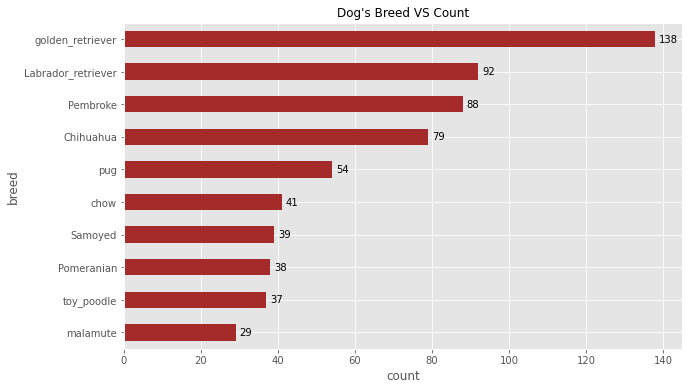

In [67]:
# Plot most common 10 breeds:
plt.figure(figsize=(10,6))
master['breed'].value_counts()[0:10].sort_values(ascending=True).plot(kind='barh' , color ='brown')

# Set x_label, y_label and title:
plt.xlabel('count',size=12)
plt.ylabel('breed', size=12)
plt.title('Dog\'s Breed VS Count' , size=12)

# Set x & y positions to add text over each bar:
x = master['breed'].value_counts()[0:10].sort_values(ascending=True).values
y= np.arange(0,10,1)

# Add text (showing value) over each bar:
for xx, yy in zip(x,y):
    plt.text(xx+1,yy,xx , va='center')

**Most Common dog stage**

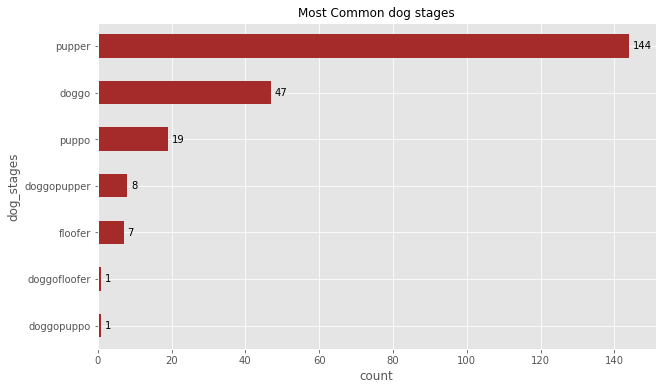

In [68]:
# Plot most common 10 breeds:
plt.figure(figsize=(10,6))
master['dog_stages'].value_counts()[0:10].sort_values(ascending=True).plot(kind='barh' , color ='brown')

# Set x_label, y_label and title:
plt.xlabel('count',size=12)
plt.ylabel('dog_stages', size=12)
plt.title('Most Common dog stages' , size=12)

# Set x & y positions to add text over each bar:
x = master['dog_stages'].value_counts()[0:10].sort_values(ascending=True).values
y= np.arange(0,10,1)

# Add text (showing value) over each bar:
for xx, yy in zip(x,y):
    plt.text(xx+1,yy,xx , va='center')

From the plot above, it can be seen clearly that the most common dog stage is the **PUPPER**

**What dog stage has the highest rating?**

In [69]:
# using pivot table to get the 10 breeds with the highest ratings

top_stages = master.pivot_table(values = "rating_numerator", index = "dog_stages", aggfunc = "mean")

top_stages.sort_values("rating_numerator", ascending = False, inplace = True)

In [70]:
top_stages = top_stages.reset_index().head(5)

top_stages = top_stages.sort_values("rating_numerator", ascending = True)

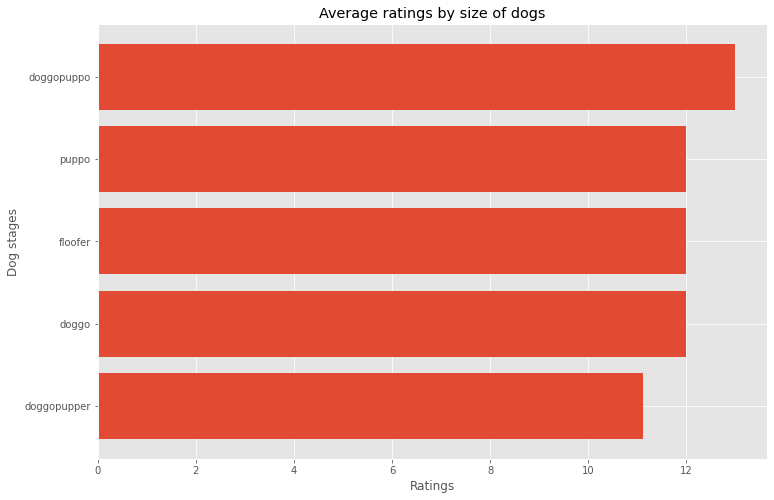

In [71]:
# now for the plot itself

plt.barh(top_stages["dog_stages"], top_stages["rating_numerator"])
 
plt.ylabel("Dog stages")
 
plt.xlabel("Ratings")
plt.title("Average ratings by size of dogs")
plt.show()

The stage with the highest rating is the **DOGGOPUPPO**

In [72]:
# using pivot table to get the 10 Dog stages with the highest favorite_count

fav_stage = master.pivot_table(values = "favorite_count", index = "dog_stages", aggfunc = "sum")

fav_stage.sort_values("favorite_count", ascending = False, inplace = True)

In [73]:
fav_stage = fav_stage.reset_index().head(10)

fav_stage = fav_stage.sort_values("favorite_count", ascending = True)

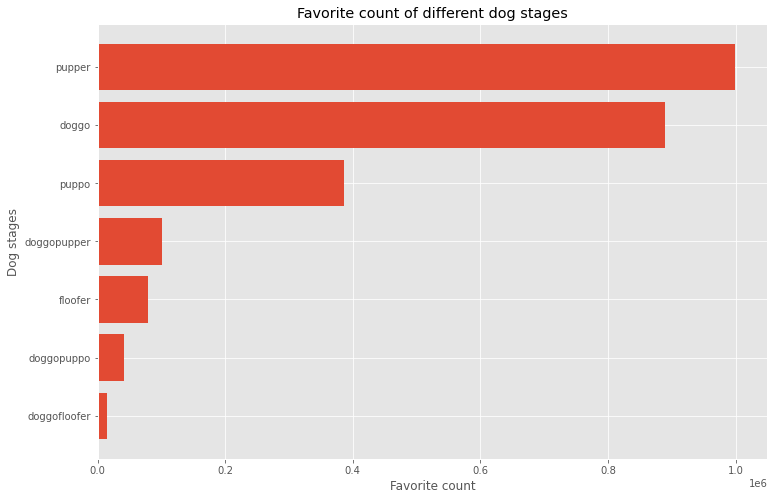

In [74]:
# now for the plot itself

plt.barh(fav_stage["dog_stages"], fav_stage["favorite_count"])
 
plt.ylabel("Dog stages")
 
plt.xlabel("Favorite count")
plt.title("Favorite count of different dog stages")
plt.show()

**PUPPER** had the highest favorite count 

**Wordcloud of the dog stage with the highest favorite count (Pupper)**

In [75]:
master_sub = master.query('dog_stages == "pupper"')

In [76]:
stop_words = ["\n"] + list(STOPWORDS)

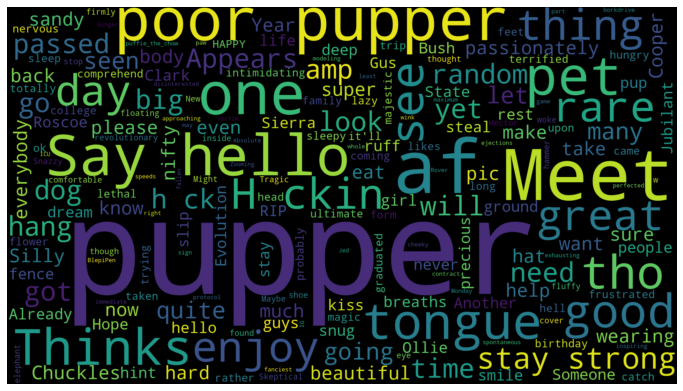

In [77]:
# word cloud for pupper

plt.subplots(figsize=(12,8))
wordcloud = WordCloud(
                          stopwords = stop_words,
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(str(item) for item in master_sub["text"]))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

**Wordcloud for the different names of dogs**

In [78]:
stop =  ["none"] + list(STOPWORDS)

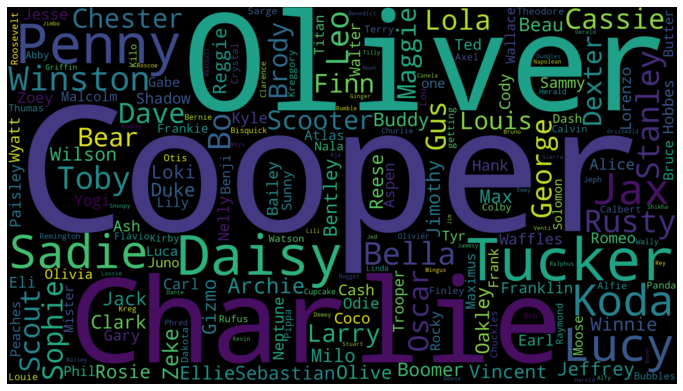

In [79]:
# word cloud for names 

plt.subplots(figsize=(12,8))
wordcloud = WordCloud(
                          stopwords = stop,
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(str(item) for item in master["name"]))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()



In [80]:
wordcloud.to_file("first_review.png")

### CONCLUSIONS

- If one of the reasons why you intend on owning a dog is to post cute pictures on twitter for high favorite counts, I'd recommend going for  a **PUPPER** because the stats has shown that most twitter dog lovers love puppers. 

- The most common breed is the golden-retriever

- Owners of puppers love to take cute pictures of their dogs and post them online

- Doggopuppo has the highest ratings in total

- Most common dog names are Oliver, Cooper and Charlie

### LIMITATIONS

- I do not know how the breeds were predicted by the people who did the machine learning models, so there could be doubts about how accurate the conclusions are. 

- The data availabe is a really small portion of the total number of tweets by @weratedog and not all breeds were properly represented so the analysis might be biased. 